In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
import cloudpickle
from urllib.request import urlopen
with urlopen("http://www.ece.ohio-state.edu/~schniter/nonpublic/eeg_dat.p") as fp:
    [X,Y] = cloudpickle.load(fp)

In [3]:
nt=Y.shape[1]
nchan=Y.shape[0]
ncur=X.shape[1]
nvoxels=ncur/3
print(" nt = %d" % (nt))
print(" nchan = %d" % (nchan))
print(" ncur = %d" % (ncur))
print(" nvoxels = %d" % (nvoxels))

 nt = 85
 nchan = 305
 ncur = 22494
 nvoxels = 7498


In [4]:
Xtr,Xts,Ytr,Yts = train_test_split(X, Y, test_size=0.33)

In [5]:
from sklearn.metrics import r2_score
regr = Ridge(alpha=1)
regr.fit(Xtr,Ytr)


Ridge(alpha=1)

In [6]:
Ytr_pre=regr.predict(Xtr)
a=r2_score(Ytr,Ytr_pre)
print(a)
Yts_pre=regr.predict(Xts)
b=r2_score(Yts,Yts_pre)
print(b)

0.6188989495024195
0.2120359798103642


In [7]:
nalpha = 20
alpha = np.logspace(-2,2,nalpha)
r2_cv_temp = np.zeros((nalpha,2))
for ind,data in enumerate(alpha):
    regression = Ridge(alpha=data)
    regression.fit(Xtr,Ytr)
    r2_cv_temp[ind,0] = regression.score(Xts,Yts)    
for ind,data in enumerate(alpha):
    regression = Ridge(alpha=data)
    regression.fit(Xts,Yts)
    r2_cv_temp[ind,1] = regression.score(Xtr,Ytr)

r2_cv=np.mean(r2_cv_temp,axis=1)

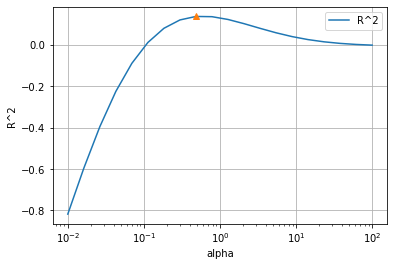

In [8]:
ind_num = np.argmax(r2_cv)
plt.semilogx(alpha,r2_cv)
plt.semilogx(alpha[ind_num],r2_cv[ind_num],'^')
plt.grid()
plt.legend(['R^2'],loc='upper right')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

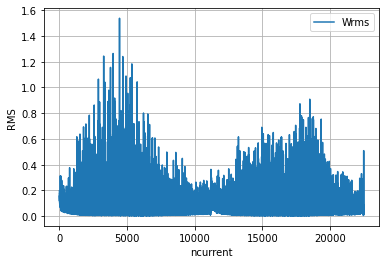

In [21]:
regropt = Ridge(alpha[ind_num])
regropt.fit(Xtr,Ytr)
W = np.transpose(regropt.coef_)
Wrms = np.zeros(ncur)
for j in range(ncur):
    Wrms[j] = np.sqrt(np.sum(W[j,:]**2))
plt.plot(Wrms)
plt.xlabel('ncurrent')
plt.ylabel('RMS')
plt.legend(['Wrms'],loc='upper right')
plt.grid()
plt.show()

In [9]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1e-4,max_iter=100,tol=0.01,warm_start = True)

In [19]:
lasso.fit(Xtr,Ytr)
r2tr = lasso.score(Xtr,Ytr)
r2ts = lasso.score(Xts,Yts)
print(r2tr)
print(r2ts)

0.7119222552125929
0.3134432878275618


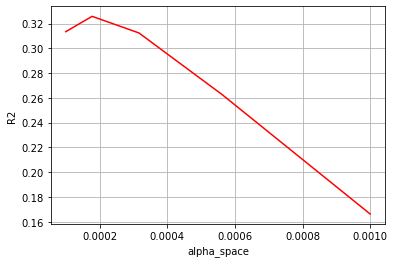

In [17]:
alpha_space = np.logspace(-4,-3,5)
W_total = np.zeros((ncur,nt,alpha_num))
scores_try = np.zeros(alpha_num)
for ind,data in enumerate(alpha_space):
    lasso_try = Lasso(alpha = data,max_iter=100,tol=0.01)
    lasso_try.fit(Xtr,Ytr)
    scores_try[ind] = lasso_try.score(Xts, Yts)
    W_total[:,:,ind] = np.transpose(lasso_try.coef_)
plt.plot(alpha_space,scores_try,'r')
plt.grid()
plt.xlabel('alpha_space')
plt.ylabel('R2')
r2best = np.argmax(scores_try)

In [22]:
print(scores_try[r2best])

0.3257850569429119


[[[ 0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.]
  ...
  [ 0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.]]

 [[-0. -0. -0. -0. -0.]
  [-0. -0. -0. -0. -0.]
  [-0. -0. -0. -0. -0.]
  ...
  [-0. -0. -0. -0. -0.]
  [-0. -0. -0. -0. -0.]
  [ 0. -0. -0. -0. -0.]]

 [[-0. -0. -0. -0. -0.]
  [-0. -0. -0. -0. -0.]
  [-0. -0. -0. -0. -0.]
  ...
  [-0. -0. -0. -0. -0.]
  [-0. -0. -0. -0. -0.]
  [ 0. -0. -0. -0. -0.]]

 ...

 [[ 0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.]
  ...
  [-0. -0.  0.  0.  0.]
  [-0. -0. -0.  0.  0.]
  [-0. -0. -0.  0.  0.]]

 [[-0. -0. -0. -0. -0.]
  [-0. -0. -0. -0. -0.]
  [-0. -0. -0. -0. -0.]
  ...
  [ 0. -0. -0. -0. -0.]
  [ 0. -0. -0. -0. -0.]
  [ 0. -0. -0. -0. -0.]]

 [[-0. -0. -0. -0. -0.]
  [-0. -0. -0. -0. -0.]
  [-0. -0. -0. -0. -0.]
  ...
  [ 0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.]]]


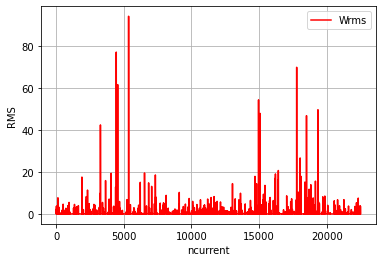

In [30]:
Wrmsopt = np.zeros(ncur)
Wopt = np.zeros((ncur,nt))
Wopt = W_total[:,:]
print(Wopt)
for j in range(ncur):
    Wrmsopt[j] = np.sqrt(np.sum(Wopt[j,:]**2))
plt.plot(Wrmsopt,'r')
plt.xlabel('ncurrent')
plt.ylabel('RMS')
plt.legend(['Wrms'],loc='upper right')
plt.grid()
plt.show()